In [1]:
import urllib.request as req
from bs4 import BeautifulSoup

url = "http://media.daum.net"

res = req.urlopen(url)
source = res.read()

# 한글깨짐 방지
source = source.decode('utf-8')

html = BeautifulSoup(source, 'html.parser')

atags = html.select('a[class=link_txt]')

result_data = []

cnt = 0

for atag in atags:
    cnt += 1
    atag_str = str(atag.string)
    result_data.append(atag_str.strip())

print(result_data, cnt)

['"비트코인 역대 신고가"…관련주도 \'불기둥\'', '쌍특검 표결 연기에 어두워진 국민의힘, 왜?', '과기정통부 "국내 이통사, 통화기록 3테라 中해킹 확인중"', '코 막힘 콧물 재채기 증상, 환절기에도 조심해야', '치매 걱정되는 중년 여성들...“요가 한 번 해봐요”', '“차라리 적금을 붓지”…낸 만큼 돌려받는 미래세대 新연금 [세대분리 연금개혁안②]', '낙하산 타고 떨어진 ‘최후의 수단’…가자주민 수백명 바다에 뛰어들었다', '"암표 꼼짝마"...에스티씨랩, 매크로 탐지 솔루션 \'엠버스터\' 출시', '퇴직연금 사전지정운용제도 1조 원 시대… 고수익 뒤 가려진 고위험', '연내 일시적 디플레 올 수 있다...손성원 교수 전망 왜? [월가월부]', '"\'김일성 시신 안치\' 금수산궁전에선 미니스커트·청바지 금지"', '삼청동·뉴욕 고급주택 ‘풀소유’ 논란 딛고…3년만에 방송 복귀한 혜민 스님', '“아 그거 맛이 뭐였지” 설명하자 음료가 ‘뚝딱’…새 기술에 눈이 번쩍', '지금, 남양주 민심 “민주당 싹쓸이? 이번엔 어림없어요”', '수능 끝나면 후회 없이 책상 벗어나 미래 위해 놀자', '[스프] 벌써 2년…이럴 줄 몰랐던 러-우 전쟁, 푸틴의 진짜 목적은', '이젠 9000만원 넘보는 비트코인…하루 만에 1000만원 넘게 올랐다', '구글 CEO "제미나이 실수 인정…기능 좋아지고 있다"', '해수부, 한자·일본식 표현 수두룩한 수산 분야 용어 손질', '"3일만에 1조원 수익"...비트코인 급등에 웃는 \'이 남자\'', '[전종철의 전격시사] 김종혁 조직부총장 (국민의힘) - “집권여당 공천잡음 이렇게 없던적 있었나”', '[정치쇼] 조규홍 장관 "\'강경 의협\'? 개원의 많아서… 다른 분들과 얘기해야"', '[주니어 생글 기자가 간다] 파리의 아름다웠던 시절을 만나다 미셸 들라크루아 전시회', '정쟁 ‘거래 수단’ 된 쌍특검 재표결과 선거구획정[이런정치]', '[현장영상+] 정부 "의료정상화, 국민과 지역 살리기 위한 마지막 기회"

In [2]:
# 텍스트 전처리
import re

def clean_text(text):
    # 문장 부호 제거 ([,.?!:\'\";] -> 빈칸으로)
    text_string_re1 = re.sub('[,.?!:\'\";]', '', text)
    # 특수 문자 제거
    text_string_re2 = re.sub('[!@#$%^&*()]|[0-9]', '', text_string_re1)
    # 영문 대,소문자 -> 소문자로 통일
    text_string_re3 = text_string_re2.lower()
    # 불필요한 공백제거 
    text_string_re4 = ' '.join(text_string_re3.split())
    return text_string_re4

clean_text2 = []

for a in result_data:
    clean_text2.append(clean_text(a))

print(clean_text2)

['비트코인 역대 신고가…관련주도 불기둥', '쌍특검 표결 연기에 어두워진 국민의힘 왜', '과기정통부 국내 이통사 통화기록 테라 中해킹 확인중', '코 막힘 콧물 재채기 증상 환절기에도 조심해야', '치매 걱정되는 중년 여성들“요가 한 번 해봐요”', '“차라리 적금을 붓지”…낸 만큼 돌려받는 미래세대 新연금 [세대분리 연금개혁안②]', '낙하산 타고 떨어진 ‘최후의 수단’…가자주민 수백명 바다에 뛰어들었다', '암표 꼼짝마에스티씨랩 매크로 탐지 솔루션 엠버스터 출시', '퇴직연금 사전지정운용제도 조 원 시대… 고수익 뒤 가려진 고위험', '연내 일시적 디플레 올 수 있다손성원 교수 전망 왜 [월가월부]', '김일성 시신 안치 금수산궁전에선 미니스커트·청바지 금지', '삼청동·뉴욕 고급주택 ‘풀소유’ 논란 딛고…년만에 방송 복귀한 혜민 스님', '“아 그거 맛이 뭐였지” 설명하자 음료가 ‘뚝딱’…새 기술에 눈이 번쩍', '지금 남양주 민심 “민주당 싹쓸이 이번엔 어림없어요”', '수능 끝나면 후회 없이 책상 벗어나 미래 위해 놀자', '[스프] 벌써 년…이럴 줄 몰랐던 러-우 전쟁 푸틴의 진짜 목적은', '이젠 만원 넘보는 비트코인…하루 만에 만원 넘게 올랐다', '구글 ceo 제미나이 실수 인정…기능 좋아지고 있다', '해수부 한자·일본식 표현 수두룩한 수산 분야 용어 손질', '일만에 조원 수익비트코인 급등에 웃는 이 남자', '[전종철의 전격시사] 김종혁 조직부총장 국민의힘 - “집권여당 공천잡음 이렇게 없던적 있었나”', '[정치쇼] 조규홍 장관 강경 의협 개원의 많아서… 다른 분들과 얘기해야', '[주니어 생글 기자가 간다] 파리의 아름다웠던 시절을 만나다 미셸 들라크루아 전시회', '정쟁 ‘거래 수단’ 된 쌍특검 재표결과 선거구획정[이런정치]', '[현장영상+] 정부 의료정상화 국민과 지역 살리기 위한 마지막 기회', '[사이테크+] 인간·유인원 꼬리 없어지게 만든 유전자 변이 찾았다', '[시선집중] 복지부 이탈 전공의 감소 추세 오늘 밤까지 복

In [3]:
# 단어 빈도 수 파악 -> 딕셔너리 자료구조

word_count = {}

# 문장 하나씩 호출
for text in clean_text2:
    # 호출한 문장에서 단어 추출
    for word in text.split():
        # 단어를 key 값, 같은 단어 추가될 때 마다 1씩 증가
        word_count[word] = word_count.get(word, 0) + 1

print(word_count)

{'비트코인': 1, '역대': 1, '신고가…관련주도': 1, '불기둥': 1, '쌍특검': 2, '표결': 1, '연기에': 1, '어두워진': 1, '국민의힘': 2, '왜': 3, '과기정통부': 1, '국내': 1, '이통사': 1, '통화기록': 1, '테라': 1, '中해킹': 1, '확인중': 1, '코': 1, '막힘': 1, '콧물': 1, '재채기': 1, '증상': 1, '환절기에도': 1, '조심해야': 1, '치매': 1, '걱정되는': 1, '중년': 1, '여성들“요가': 1, '한': 1, '번': 1, '해봐요”': 1, '“차라리': 1, '적금을': 1, '붓지”…낸': 1, '만큼': 1, '돌려받는': 1, '미래세대': 1, '新연금': 1, '[세대분리': 1, '연금개혁안②]': 1, '낙하산': 1, '타고': 2, '떨어진': 1, '‘최후의': 1, '수단’…가자주민': 1, '수백명': 1, '바다에': 1, '뛰어들었다': 1, '암표': 1, '꼼짝마에스티씨랩': 1, '매크로': 1, '탐지': 1, '솔루션': 1, '엠버스터': 1, '출시': 1, '퇴직연금': 1, '사전지정운용제도': 1, '조': 1, '원': 1, '시대…': 1, '고수익': 1, '뒤': 1, '가려진': 1, '고위험': 1, '연내': 2, '일시적': 2, '디플레': 2, '올': 2, '수': 2, '있다손성원': 2, '교수': 2, '전망': 2, '[월가월부]': 2, '김일성': 1, '시신': 1, '안치': 1, '금수산궁전에선': 1, '미니스커트·청바지': 1, '금지': 1, '삼청동·뉴욕': 1, '고급주택': 1, '‘풀소유’': 1, '논란': 1, '딛고…년만에': 1, '방송': 1, '복귀한': 1, '혜민': 1, '스님': 1, '“아': 1, '그거': 1, '맛이': 1, '뭐였지”': 1, '설명하자': 1, '음료가': 1, '‘뚝딱’…새': 1, '기술에': 1, '눈이':

In [5]:
# 단어 전처리 -> 2회 이상 나온 단어 + 글자수 2~5자 단어만 선정

new_word_count = {}

for word, count in word_count.items():
    if count >= 2 and len(word) >=2 and len(word) <=5:
        print(word, "->", word_count[word])
        new_word_count[word] = new_word_count.get(word, count)

print(new_word_count)

쌍특검 -> 2
국민의힘 -> 2
타고 -> 2
연내 -> 2
일시적 -> 2
디플레 -> 2
있다손성원 -> 2
교수 -> 2
전망 -> 2
만원 -> 2
장관 -> 2
지역 -> 2
전공의 -> 2
복귀 -> 2
{'쌍특검': 2, '국민의힘': 2, '타고': 2, '연내': 2, '일시적': 2, '디플레': 2, '있다손성원': 2, '교수': 2, '전망': 2, '만원': 2, '장관': 2, '지역': 2, '전공의': 2, '복귀': 2}


In [6]:
# 통계 작성
from collections import Counter

count_result = Counter(new_word_count)
top5_word = count_result.most_common(5)
print(top5_word)

[('쌍특검', 2), ('국민의힘', 2), ('타고', 2), ('연내', 2), ('일시적', 2)]


['쌍특검', '국민의힘', '타고', '연내', '일시적'] [2, 2, 2, 2, 2]


C:\Users\hsb97\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49933 (\N{HANGUL SYLLABLE SSANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hsb97\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hsb97\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hsb97\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hsb97\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE M

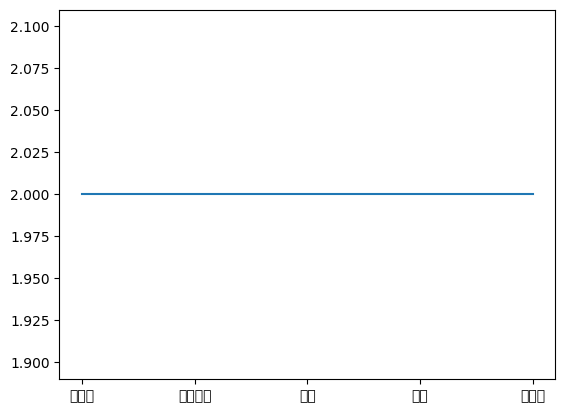

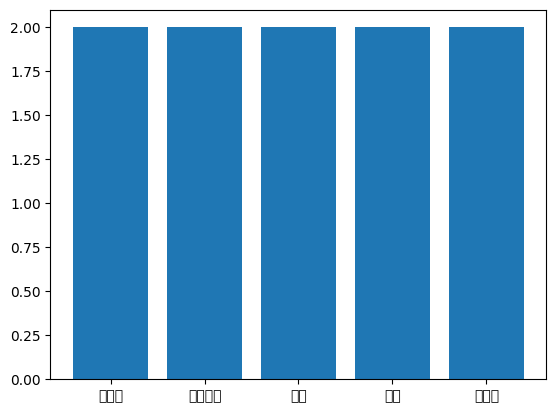

In [8]:
# 그래프 작성
# x축 : 키워드
# y축 : 빈도수

words =[]
counts = []

for word, count in top5_word:
    words.append(word)
    counts.append(count)

print(words, counts)

import matplotlib.pyplot as plt

# 선 그래프
plt.plot(words, counts)
plt.show()

# 막대 그래프
plt.bar(words, counts)
plt.show()

In [10]:
# 다음 영화 순위 크롤링

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options


# 현재 다음에서 제공되는 연도는 2013~2023년까지
# 그 외의 연도는 범위에 넣어도 이미지 출력되지않음
for year in range(2013, 2023):
    url = "https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q={}%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84".format(year)

    chrome_options = Options()
    chrome_options.add_argument("--headless")
    driver = webdriver.Chrome(options=chrome_options)

    driver.get(url)
    images = driver.find_elements(By.CSS_SELECTOR, "img.thumb_img")

    for (index, image) in enumerate(images):
        screenshot_filename = "screenshot_{}_{}.png".format(year, index + 1)
        image.screenshot(screenshot_filename)
        print("이미지 저장완료 : ", screenshot_filename)

        # 상위 3개 이미지만
        if index >=2:
            break

이미지 저장완료 :  screenshot_2013_1.png
이미지 저장완료 :  screenshot_2013_2.png
이미지 저장완료 :  screenshot_2013_3.png
이미지 저장완료 :  screenshot_2014_1.png
이미지 저장완료 :  screenshot_2014_2.png
이미지 저장완료 :  screenshot_2014_3.png
이미지 저장완료 :  screenshot_2015_1.png
이미지 저장완료 :  screenshot_2015_2.png
이미지 저장완료 :  screenshot_2015_3.png
이미지 저장완료 :  screenshot_2016_1.png
이미지 저장완료 :  screenshot_2016_2.png
이미지 저장완료 :  screenshot_2016_3.png
이미지 저장완료 :  screenshot_2017_1.png
이미지 저장완료 :  screenshot_2017_2.png
이미지 저장완료 :  screenshot_2017_3.png
이미지 저장완료 :  screenshot_2018_1.png
이미지 저장완료 :  screenshot_2018_2.png
이미지 저장완료 :  screenshot_2018_3.png
이미지 저장완료 :  screenshot_2019_1.png
이미지 저장완료 :  screenshot_2019_2.png
이미지 저장완료 :  screenshot_2019_3.png
이미지 저장완료 :  screenshot_2020_1.png
이미지 저장완료 :  screenshot_2020_2.png
이미지 저장완료 :  screenshot_2020_3.png
이미지 저장완료 :  screenshot_2021_1.png
이미지 저장완료 :  screenshot_2021_2.png
이미지 저장완료 :  screenshot_2021_3.png
이미지 저장완료 :  screenshot_2022_1.png
이미지 저장완료 :  screenshot_2022_2.png
이미지 저장완료 :  sc